In [ ]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

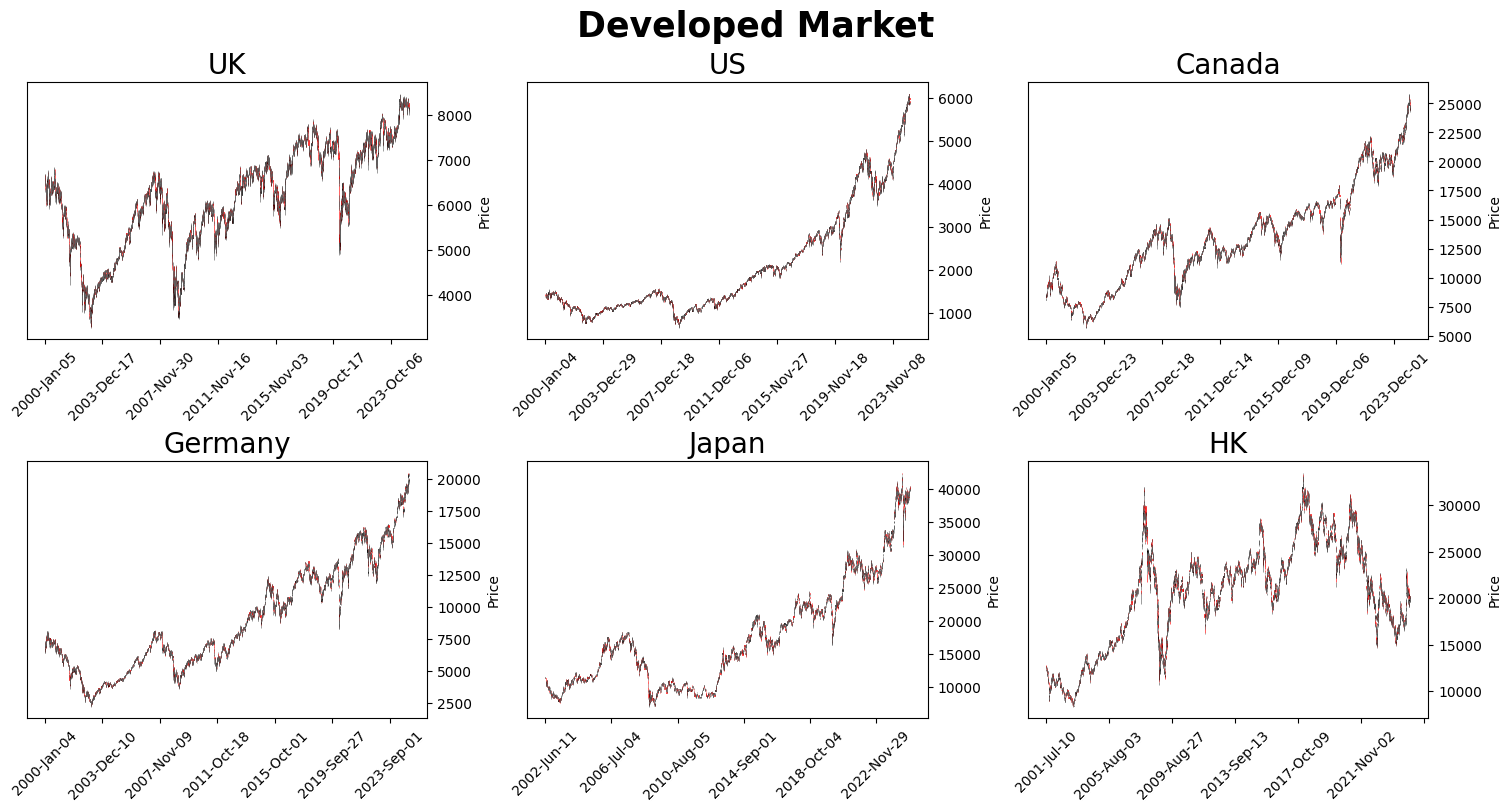

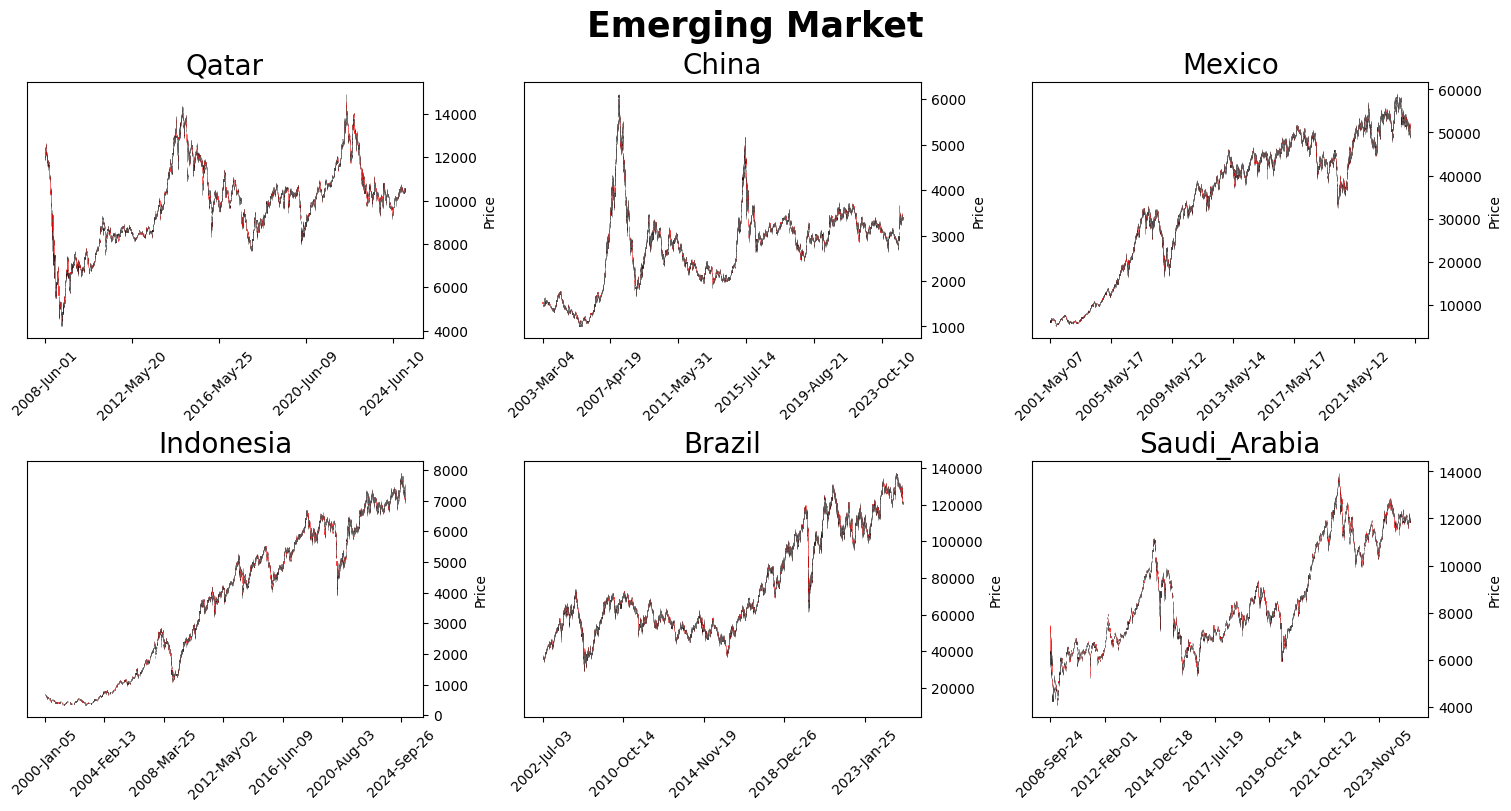

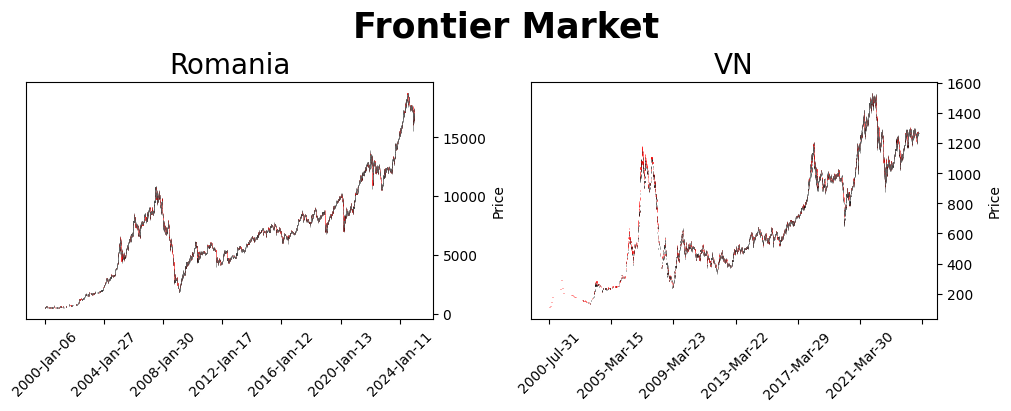

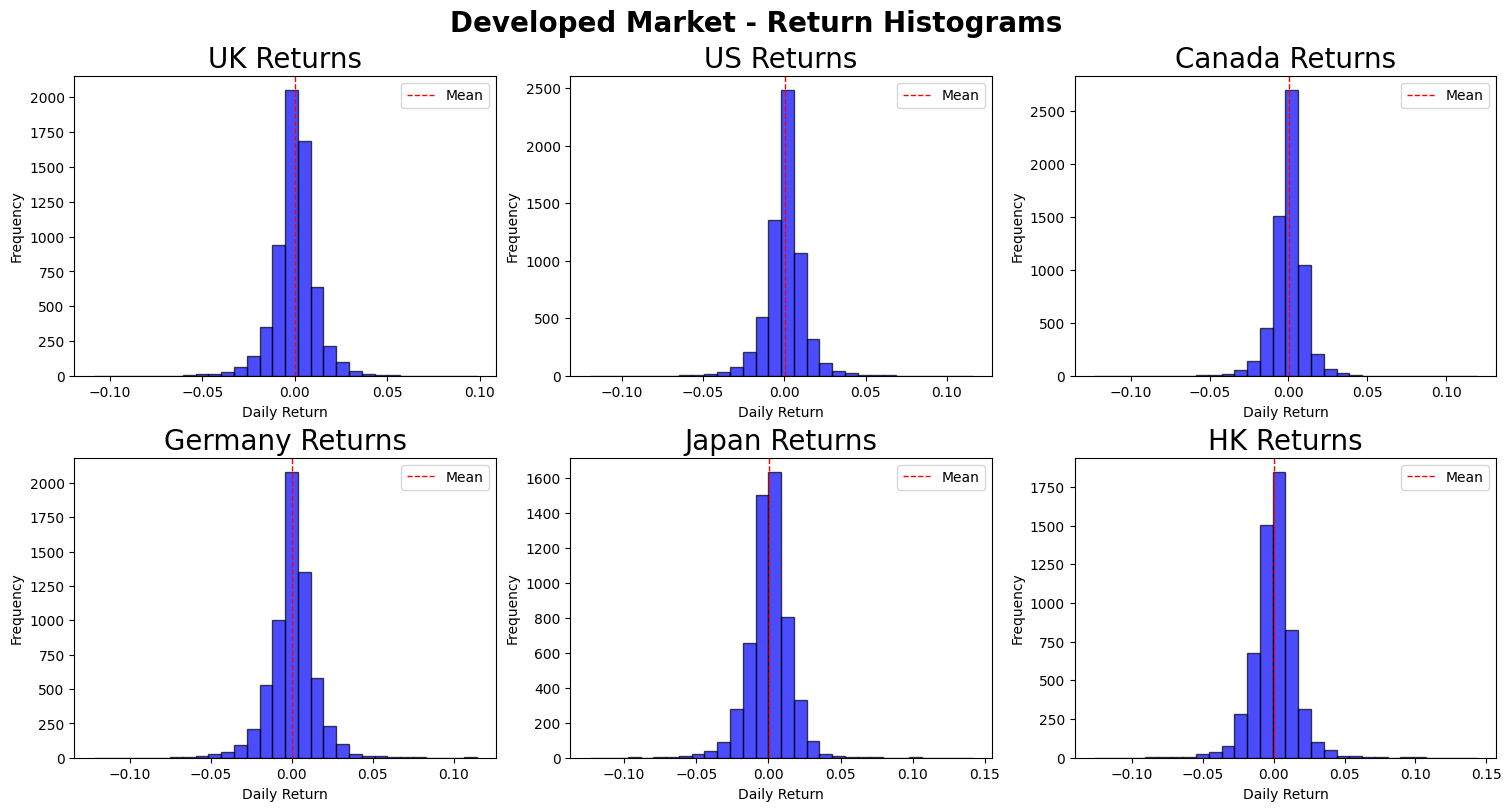

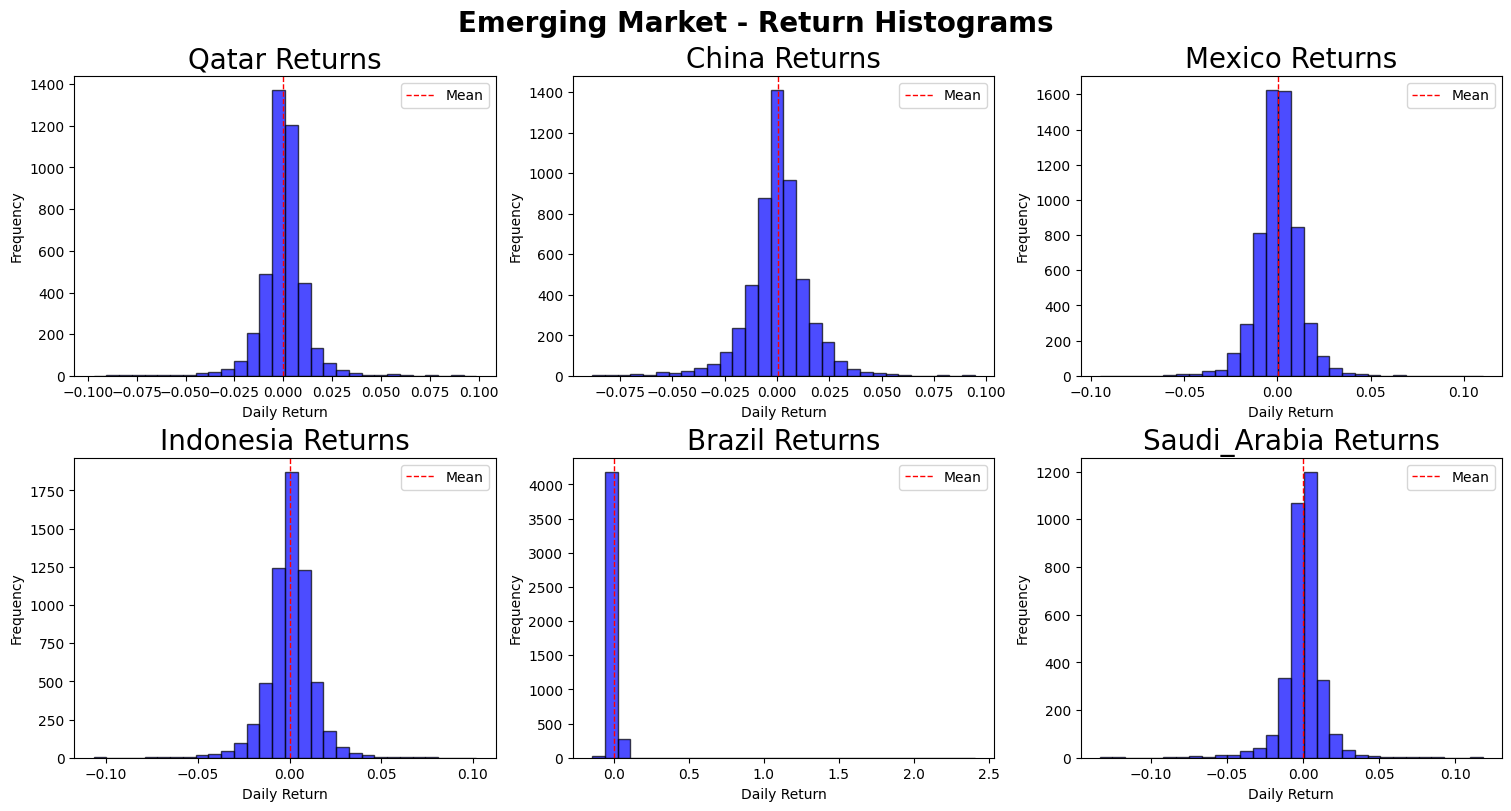

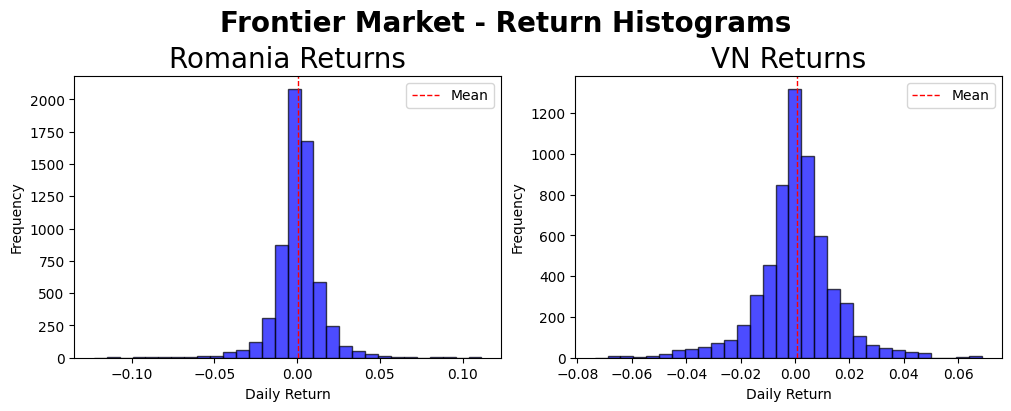


Developed Market - Descriptive Statistics

UK:

    Metric      Value
Start Date 2000-01-05
      Mean   0.000098
   Std Dev    0.01144
  Skewness  -0.171425
  Kurtosis   8.025761
   Up Days       3279
 Down Days       3025

--------------------------------------------------

US:

    Metric      Value
Start Date 2000-01-04
      Mean   0.000297
   Std Dev   0.012215
  Skewness  -0.162352
  Kurtosis  10.184075
   Up Days       3369
 Down Days       2916

--------------------------------------------------

Canada:

    Metric      Value
Start Date 2000-01-05
      Mean   0.000235
   Std Dev   0.010839
  Skewness  -0.630475
  Kurtosis   16.12759
   Up Days       3402
 Down Days       2864

--------------------------------------------------

Germany:

    Metric      Value
Start Date 2000-01-04
      Mean   0.000273
   Std Dev    0.01429
  Skewness   0.003933
  Kurtosis   6.156659
   Up Days       3359
 Down Days       2975

--------------------------------------------------

Japan:

   

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from scipy.stats import skew, kurtosis

# Define the path where CSV files are stored
csv_dir = "/content/"

# Define market groups
developed_tickers = ['US', 'UK', 'Canada', 'Japan', 'Germany', 'HK']
emerging_tickers = ['Brazil', 'Mexico', 'Qatar', 'Saudi_Arabia', 'China', 'Indonesia']
frontier_tickers = ['VN', 'Romania']

# Dictionary to store data
market_data = {'Developed': [], 'Emerging': [], 'Frontier': []}

# Read all CSVs and store data
for file in os.listdir(csv_dir):
    if file.endswith(".csv"):
        ticker = file.replace(".csv", "")
        file_path = os.path.join(csv_dir, file)

        df = pd.read_csv(file_path)

        # Ensure required columns exist
        required_columns = {'Date', 'open', 'high', 'low', 'close', 'volume'}
        if not required_columns.issubset(df.columns):
            print(f"Skipping {file} (missing columns)")
            continue

        # Convert Date column to datetime and set as index
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Calculate daily return
        df['Return'] = df['close'].pct_change()

        # Drop NaN values (first return will be NaN)
        df.dropna(inplace=True)

        # Store data based on market category
        if ticker in developed_tickers:
            market_data['Developed'].append((ticker, df))
        elif ticker in emerging_tickers:
            market_data['Emerging'].append((ticker, df))
        elif ticker in frontier_tickers:
            market_data['Frontier'].append((ticker, df))

# Function to plot grouped candlestick charts with volume overlaid
def plot_market_data(market_name, data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

    # Ensure axes is always a 2D array
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1 or cols == 1:
        axes = axes.reshape(rows, cols)

    for i, (ticker, df) in enumerate(data):
        row, col = divmod(i, cols)  # Determine subplot position
        ax = axes[row][col]  # Select subplot

        # Candlestick chart with volume overlaid
        mpf.plot(df, type='candle', style='checkers', ax=ax)

        ax.set_title(ticker, fontsize=20)

    # Hide unused subplots
    for j in range(i + 1, rows * cols):
        row, col = divmod(j, cols)
        fig.delaxes(axes[row][col])

    plt.suptitle(f"{market_name} Market", fontsize=25, fontweight='bold')
    plt.show()

# Function to plot grouped return histograms
def plot_return_histograms(market_name, data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)
    axes = axes.flatten()

    for i, (ticker, df) in enumerate(data):
        ax = axes[i]
        ax.hist(df['Return'], bins=30, color='blue', alpha=0.7, edgecolor='black')
        ax.axvline(df['Return'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
        ax.set_title(f"{ticker} Returns", fontsize=20)
        ax.set_xlabel("Daily Return")
        ax.set_ylabel("Frequency")
        ax.legend()

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"{market_name} Market - Return Histograms", fontsize=20, fontweight='bold')
    plt.show()

# Function to print descriptive statistics
def print_statistics(market_name, data):
    print(f"\n{'='*50}\n{market_name} Market - Descriptive Statistics\n{'='*50}")

    for ticker, df in data:
        mean_return = df['Return'].mean()
        std_return = df['Return'].std()
        skewness = skew(df['Return'])
        kurt = kurtosis(df['Return'])
        start_date = df.index.min().strftime('%Y-%m-%d')  # Start date
        up_days = (df['Return'] > 0).sum()
        down_days = (df['Return'] < 0).sum()

        # Create a DataFrame for better formatting
        stats_table = pd.DataFrame({
            'Metric': ['Start Date', 'Mean', 'Std Dev', 'Skewness', 'Kurtosis', 'Up Days', 'Down Days'],
            'Value': [start_date, mean_return, std_return, skewness, kurt, up_days, down_days]
        })

        stats_table['Value'] = stats_table['Value'].round(4)  # Round to 4 decimals
        print(f"\n{ticker}:\n")
        print(stats_table.to_string(index=False))
        print("\n" + "-"*50)

# Plot all markets
plot_market_data("Developed", market_data['Developed'], 2, 3)
plot_market_data("Emerging", market_data['Emerging'], 2, 3)
plot_market_data("Frontier", market_data['Frontier'], 1, 2)

# Plot return histograms
plot_return_histograms("Developed", market_data['Developed'], 2, 3)
plot_return_histograms("Emerging", market_data['Emerging'], 2, 3)
plot_return_histograms("Frontier", market_data['Frontier'], 1, 2)

# Print descriptive statistics
print_statistics("Developed", market_data['Developed'])
print_statistics("Emerging", market_data['Emerging'])
print_statistics("Frontier", market_data['Frontier'])
